In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from keras.models import load_model
import matplotlib.pyplot as plt

2025-11-18 10:12:07.526834: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-18 10:12:07.530446: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-18 10:12:07.540163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-18 10:12:07.554841: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-18 10:12:07.559402: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-18 10:12:07.571772: I tensorflow/core/platform/cpu_feature_gu

In [2]:
def plot_bar_with_values(values, labels, title, color):
    plt.figure(figsize=(8,5))
    bars = plt.bar(labels, [v*100 for v in values], color=color)  # Convert to % for bar height
    plt.title(title)
    plt.ylim(0, 110)
    plt.ylabel(title.split(' on ')[0] + ' (%)')
    plt.grid(axis='y')
    
    # Add number on top of each bar
    for bar, v in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{v*100:.2f}', ha='center', va='bottom')
    plt.show()

In [3]:
labels = ["N1", "N2", "N3", "N4", "N5"]

In [4]:
filename_model_N1 = '../Train/model_N1.keras'
loaded_model_N1 = load_model(filename_model_N1)

In [5]:
filename_model_N2 = '../Train/model_N2.keras'
loaded_model_N2 = load_model(filename_model_N2)

In [6]:
filename_model_N3 = '../Train/model_N3.keras'
loaded_model_N3 = load_model(filename_model_N3)

In [7]:
filename_model_N4 = '../Train/model_N4.keras'
loaded_model_N4 = load_model(filename_model_N4)

In [8]:
filename_model_N5 = '../Train/model_N5.keras'
loaded_model_N5 = load_model(filename_model_N5)

In [9]:
scaler_df = QuantileTransformer(output_distribution='normal')

In [10]:
df_test_N1 = pd.read_parquet("../Dataset/NF-UNSW-NB15/NF-UNSW-NB15-V2_sample.parquet")

In [11]:
load_X_df_test_N1 = df_test_N1.drop(["Label"],axis=1)
Y_df_test_N1 = df_test_N1["Label"]

In [12]:
X_df_test_N1 = scaler_df.fit_transform(load_X_df_test_N1)

In [13]:
df_test_N2 = pd.read_parquet("../Dataset/NF-ToN-IoT/NF-ToN-IoT-V2_test.parquet")

In [14]:
load_X_df_test_N2 = df_test_N2.drop(["Label"], axis=1)
Y_df_test_N2 = df_test_N2["Label"]

In [15]:
X_df_test_N2 = scaler_df.fit_transform(load_X_df_test_N2)

In [16]:
df_test_N3 = pd.read_parquet("../Dataset/NF-BoT-IoT/NF-BoT-IoT-V2_test.parquet")

In [17]:
load_X_df_test_N3 = df_test_N3.drop(["Label"], axis=1)
Y_df_test_N3 = df_test_N3["Label"]

In [18]:
X_df_test_N3 = scaler_df.fit_transform(load_X_df_test_N3)

In [19]:
df_test_N4 = pd.read_parquet("../Dataset/NF-CSE-CIC-IDS2018/NF-CSE-CIC-IDS2018-V2_test.parquet")

In [20]:
load_X_df_test_N4 = df_test_N4.drop(["Label"], axis=1)
Y_df_test_N4 = df_test_N4["Label"]

In [21]:
X_df_test_N4 = scaler_df.fit_transform(load_X_df_test_N4)

In [22]:
df_test_N5 = pd.read_parquet("../Dataset/NF-UQ-NIDS/NF-UQ-NIDS-V2_test.parquet")

In [23]:
load_X_df_test_N5 = df_test_N5.drop(["Label"], axis=1)
Y_df_test_N5 = df_test_N5["Label"]

In [24]:
X_df_test_N5 = scaler_df.fit_transform(load_X_df_test_N5)

In [25]:
score_N1_test_N1 = loaded_model_N1.evaluate(X_df_test_N1, Y_df_test_N1, verbose=1)

print('Test Model Network 1 with Data Test Network 1:')
print('Test loss:', score_N1_test_N1[0])
print('Test accuracy:', score_N1_test_N1[1])
print('Test recall:', score_N1_test_N1[2])
print('Test precision:', score_N1_test_N1[3])

# Calculate F1-score
f1_score_N1_test_N1 = 2 * (score_N1_test_N1[3] * score_N1_test_N1[2]) / (score_N1_test_N1[3] + score_N1_test_N1[2])

print('Test F1-score:', f1_score_N1_test_N1)

4347/4347 ━━━━━━━━━━━━━━━━━━━━ 4s 880us/step - accuracy: 0.9954 - loss: 0.0115 - precision: 0.9088 - recall: 0.9744
Test Model Network 1 with Data Test Network 1:
Test loss: 0.011690706945955753
Test accuracy: 0.995290219783783
Test recall: 0.9715631008148193
Test precision: 0.9110012650489807
Test F1-score: 0.9403080499838227


In [26]:
score_N1_test_N2 = loaded_model_N1.evaluate(X_df_test_N2, Y_df_test_N2, verbose=1)

print('Test Model Network 1 with Data Test Network 2:')
print('Test loss:', score_N1_test_N2[0])
print('Test accuracy:', score_N1_test_N2[1])
print('Test recall:', score_N1_test_N2[2])
print('Test precision:', score_N1_test_N2[3])

# Calculate F1-score
f1_score_N1_test_N2 = 2 * (score_N1_test_N2[3] * score_N1_test_N2[2]) / (score_N1_test_N2[3] + score_N1_test_N2[2])

print('Test F1-score:', f1_score_N1_test_N2)

110834/110834 ━━━━━━━━━━━━━━━━━━━━ 87s 788us/step - accuracy: 0.2669 - loss: 10.3928 - precision: 0.0245 - recall: 2.4575e-04
Test Model Network 1 with Data Test Network 2:
Test loss: 10.39262866973877
Test accuracy: 0.26711738109588623
Test recall: 0.00023886584676802158
Test precision: 0.02377362921833992
Test F1-score: 0.00047297942663520687


In [27]:
score_N1_test_N3 = loaded_model_N1.evaluate(X_df_test_N3, Y_df_test_N3, verbose=1)

print('Test Model Network 1 with Data Test Network 3:')
print('Test loss:', score_N1_test_N3[0])
print('Test accuracy:', score_N1_test_N3[1])
print('Test recall:', score_N1_test_N3[2])
print('Test precision:', score_N1_test_N3[3])

# Calculate F1-score
f1_score_N1_test_N3 = 2 * (score_N1_test_N3[3] * score_N1_test_N3[2]) / (score_N1_test_N3[3] + score_N1_test_N3[2])

print('Test F1-score:', f1_score_N1_test_N3)

256670/256670 ━━━━━━━━━━━━━━━━━━━━ 202s 785us/step - accuracy: 0.0042 - loss: 9.2457 - precision: 0.1425 - recall: 1.3876e-05
Test Model Network 1 with Data Test Network 3:
Test loss: 9.245450973510742
Test accuracy: 0.004188144113868475
Test recall: 1.4794885828450788e-05
Test precision: 0.15837696194648743
Test F1-score: 2.958700776752937e-05


In [28]:
score_N1_test_N4 = loaded_model_N1.evaluate(X_df_test_N4, Y_df_test_N4, verbose=1)

print('Test Model Network 1 with Data Test Network 4:')
print('Test loss:', score_N1_test_N4[0])
print('Test accuracy:', score_N1_test_N4[1])
print('Test recall:', score_N1_test_N4[2])
print('Test precision:', score_N1_test_N4[3])

# Calculate F1-score
f1_score_N1_test_N4 = 2 * (score_N1_test_N4[3] * score_N1_test_N4[2]) / (score_N1_test_N4[3] + score_N1_test_N4[2])

print('Test F1-score:', f1_score_N1_test_N4)

144532/144532 ━━━━━━━━━━━━━━━━━━━━ 114s 785us/step - accuracy: 0.7072 - loss: 1.6470 - precision: 0.0061 - recall: 0.0090
Test Model Network 1 with Data Test Network 4:
Test loss: 1.6473289728164673
Test accuracy: 0.7070775628089905
Test recall: 0.008893189951777458
Test precision: 0.005961540155112743
Test F1-score: 0.007138077719766188


In [29]:
score_N1_test_N5 = loaded_model_N1.evaluate(X_df_test_N5, Y_df_test_N5, verbose=1)

print('Test Model Network 1 with Data Test Network 5:')
print('Test loss:', score_N1_test_N5[0])
print('Test accuracy:', score_N1_test_N5[1])
print('Test recall:', score_N1_test_N5[2])
print('Test precision:', score_N1_test_N5[3])

# Calculate F1-score
f1_score_N1_test_N5 = 2 * (score_N1_test_N5[3] * score_N1_test_N5[2]) / (score_N1_test_N5[3] + score_N1_test_N5[2])

print('Test F1-score:', f1_score_N1_test_N5)

528796/528796 ━━━━━━━━━━━━━━━━━━━━ 416s 786us/step - accuracy: 0.3038 - loss: 6.7041 - precision: 0.0336 - recall: 0.0015
Test Model Network 1 with Data Test Network 5:
Test loss: 6.703620910644531
Test accuracy: 0.3037997782230377
Test recall: 0.0014658080181106925
Test precision: 0.03379274159669876
Test F1-score: 0.002809739602310721


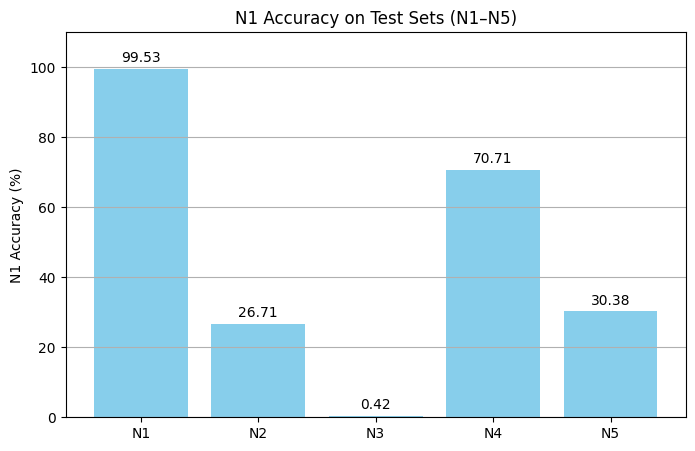

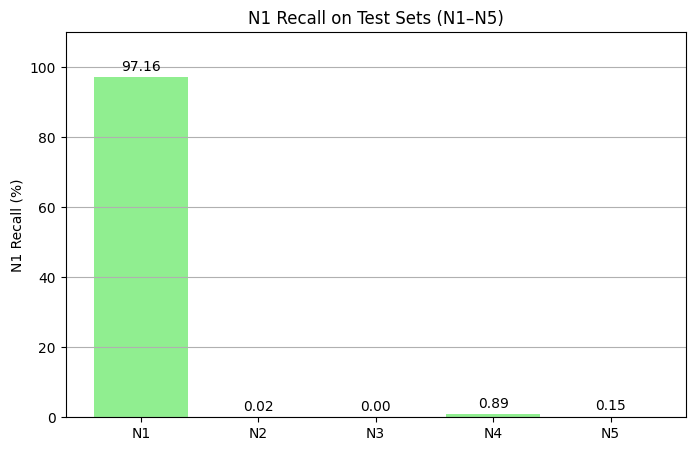

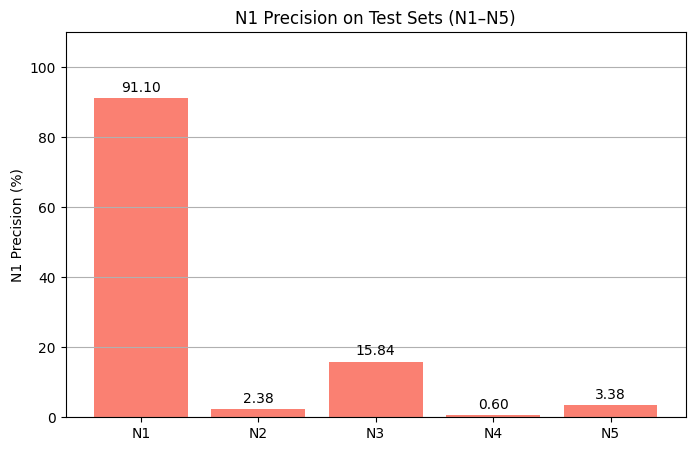

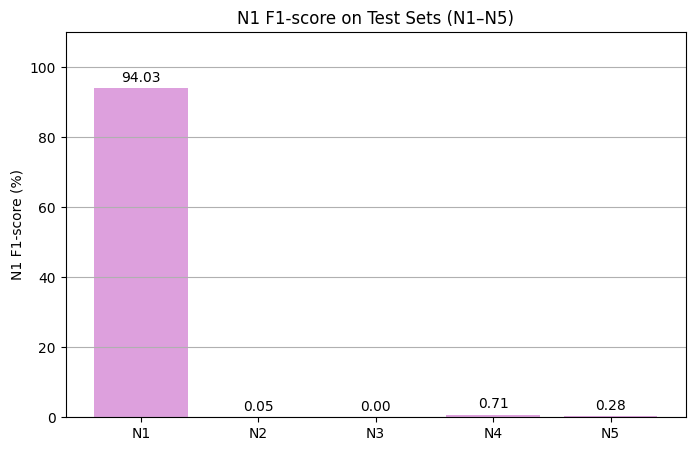

In [30]:
# ====== METRICS FOR N1 MODEL ======
accuracy_N1 = [
    score_N1_test_N1[1],
    score_N1_test_N2[1],
    score_N1_test_N3[1],
    score_N1_test_N4[1],
    score_N1_test_N5[1]
]

recall_N1 = [
    score_N1_test_N1[2],
    score_N1_test_N2[2],
    score_N1_test_N3[2],
    score_N1_test_N4[2],
    score_N1_test_N5[2]
]

precision_N1 = [
    score_N1_test_N1[3],
    score_N1_test_N2[3],
    score_N1_test_N3[3],
    score_N1_test_N4[3],
    score_N1_test_N5[3]
]

# F1-score for N1
f1_score_N1 = [
    2 * (precision_N1[i] * recall_N1[i]) / (precision_N1[i] + recall_N1[i])
    for i in range(5)
]

# ====== Plot each metric ======
plot_bar_with_values(accuracy_N1, labels, 'N1 Accuracy on Test Sets (N1–N5)', 'skyblue')
plot_bar_with_values(recall_N1, labels, 'N1 Recall on Test Sets (N1–N5)', 'lightgreen')
plot_bar_with_values(precision_N1, labels, 'N1 Precision on Test Sets (N1–N5)', 'salmon')
plot_bar_with_values(f1_score_N1, labels, 'N1 F1-score on Test Sets (N1–N5)', 'plum')

In [31]:
score_N2_test_N1 = loaded_model_N2.evaluate(X_df_test_N1, Y_df_test_N1, verbose=1)

print('Test Model Network 2 with Data Test Network 1:')
print('Test loss:', score_N2_test_N1[0])
print('Test accuracy:', score_N2_test_N1[1])
print('Test recall:', score_N2_test_N1[2])
print('Test precision:', score_N2_test_N1[3])

f1_score_N2_test_N1 = 2 * (score_N2_test_N1[3] * score_N2_test_N1[2]) / (score_N2_test_N1[3] + score_N2_test_N1[2])
print('Test F1-score:', f1_score_N2_test_N1)

4347/4347 ━━━━━━━━━━━━━━━━━━━━ 4s 794us/step - accuracy: 0.4098 - loss: 3.7312 - precision: 0.0120 - recall: 0.1812
Test Model Network 2 with Data Test Network 1:
Test loss: 3.75514554977417
Test accuracy: 0.408231645822525
Test recall: 0.18926553428173065
Test precision: 0.012721680104732513
Test F1-score: 0.023840871208577124


In [32]:
score_N2_test_N2 = loaded_model_N2.evaluate(X_df_test_N2, Y_df_test_N2, verbose=1)

print('Test Model Network 2 with Data Test Network 2:')
print('Test loss:', score_N2_test_N2[0])
print('Test accuracy:', score_N2_test_N2[1])
print('Test recall:', score_N2_test_N2[2])
print('Test precision:', score_N2_test_N2[3])

f1_score_N2_test_N2 = 2 * (score_N2_test_N2[3] * score_N2_test_N2[2]) / (score_N2_test_N2[3] + score_N2_test_N2[2])
print('Test F1-score:', f1_score_N2_test_N2)

110834/110834 ━━━━━━━━━━━━━━━━━━━━ 88s 793us/step - accuracy: 0.9747 - loss: 0.0678 - precision: 0.9749 - recall: 0.9906
Test Model Network 2 with Data Test Network 2:
Test loss: 0.06809110194444656
Test accuracy: 0.9746659398078918
Test recall: 0.9906178116798401
Test precision: 0.9748888611793518
Test F1-score: 0.9826904010330229


In [33]:
score_N2_test_N3 = loaded_model_N2.evaluate(X_df_test_N3, Y_df_test_N3, verbose=1)

print('Test Model Network 2 with Data Test Network 3:')
print('Test loss:', score_N2_test_N3[0])
print('Test accuracy:', score_N2_test_N3[1])
print('Test recall:', score_N2_test_N3[2])
print('Test precision:', score_N2_test_N3[3])

f1_score_N2_test_N3 = 2 * (score_N2_test_N3[3] * score_N2_test_N3[2]) / (score_N2_test_N3[3] + score_N2_test_N3[2])
print('Test F1-score:', f1_score_N2_test_N3)

256670/256670 ━━━━━━━━━━━━━━━━━━━━ 203s 789us/step - accuracy: 0.5515 - loss: 13.6991 - precision: 0.9937 - recall: 0.5531
Test Model Network 2 with Data Test Network 3:
Test loss: 13.69729232788086
Test accuracy: 0.5516214370727539
Test recall: 0.5532159805297852
Test precision: 0.993696928024292
Test F1-score: 0.7107433357708988


In [34]:
score_N2_test_N4 = loaded_model_N2.evaluate(X_df_test_N4, Y_df_test_N4, verbose=1)

print('Test Model Network 2 with Data Test Network 4:')
print('Test loss:', score_N2_test_N4[0])
print('Test accuracy:', score_N2_test_N4[1])
print('Test recall:', score_N2_test_N4[2])
print('Test precision:', score_N2_test_N4[3])

f1_score_N2_test_N4 = 2 * (score_N2_test_N4[3] * score_N2_test_N4[2]) / (score_N2_test_N4[3] + score_N2_test_N4[2])
print('Test F1-score:', f1_score_N2_test_N4)

144532/144532 ━━━━━━━━━━━━━━━━━━━━ 114s 791us/step - accuracy: 0.6555 - loss: 1.3562 - precision: 0.2361 - recall: 0.8534
Test Model Network 2 with Data Test Network 4:
Test loss: 1.3564791679382324
Test accuracy: 0.6554425954818726
Test recall: 0.854011058807373
Test precision: 0.23603875935077667
Test F1-score: 0.36985412489374747


In [35]:
score_N2_test_N5 = loaded_model_N2.evaluate(X_df_test_N5, Y_df_test_N5, verbose=1)

print('Test Model Network 2 with Data Test Network 5:')
print('Test loss:', score_N2_test_N5[0])
print('Test accuracy:', score_N2_test_N5[1])
print('Test recall:', score_N2_test_N5[2])
print('Test precision:', score_N2_test_N5[3])

f1_score_N2_test_N5 = 2 * (score_N2_test_N5[3] * score_N2_test_N5[2]) / (score_N2_test_N5[3] + score_N2_test_N5[2])
print('Test F1-score:', f1_score_N2_test_N5)

528796/528796 ━━━━━━━━━━━━━━━━━━━━ 418s 791us/step - accuracy: 0.5329 - loss: 7.6466 - precision: 0.6528 - recall: 0.6452
Test Model Network 2 with Data Test Network 5:
Test loss: 7.641094207763672
Test accuracy: 0.5330517292022705
Test recall: 0.64521723985672
Test precision: 0.6528748869895935
Test F1-score: 0.6490234765980775


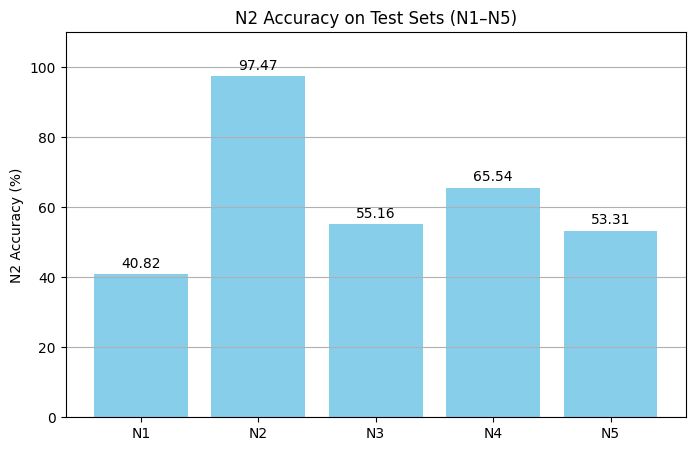

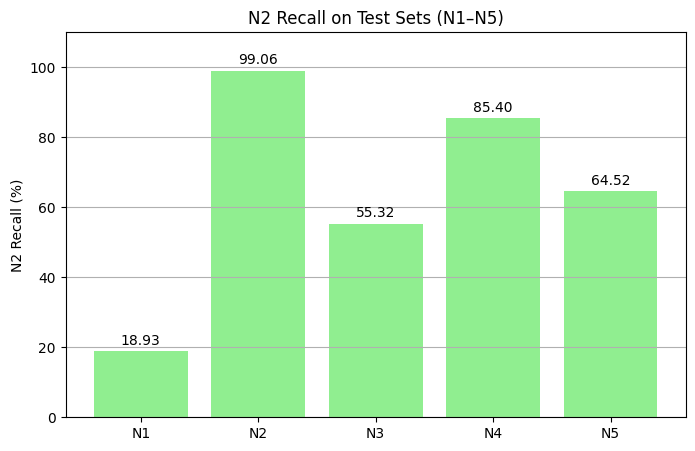

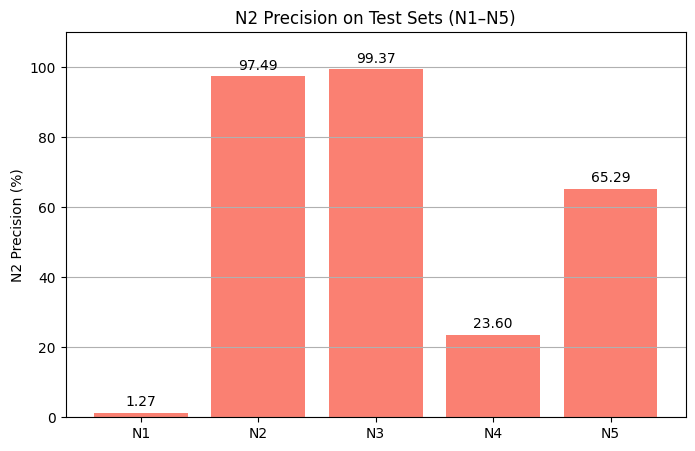

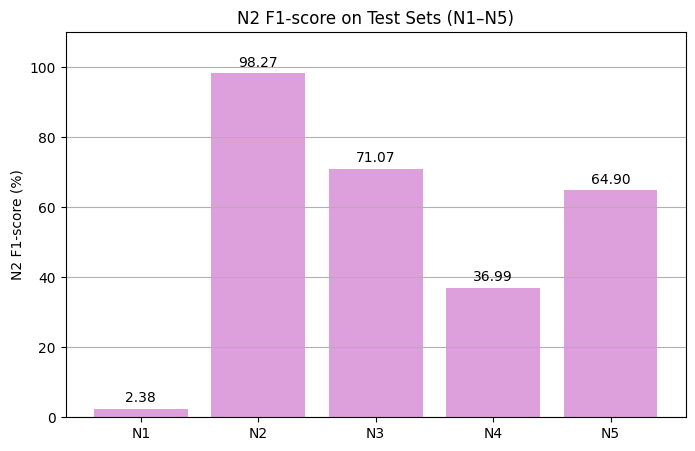

In [36]:
# ====== Metrics for N2 ======
accuracy_N2 = [
    score_N2_test_N1[1],
    score_N2_test_N2[1],
    score_N2_test_N3[1],
    score_N2_test_N4[1],
    score_N2_test_N5[1]
]

recall_N2 = [
    score_N2_test_N1[2],
    score_N2_test_N2[2],
    score_N2_test_N3[2],
    score_N2_test_N4[2],
    score_N2_test_N5[2]
]

precision_N2 = [
    score_N2_test_N1[3],
    score_N2_test_N2[3],
    score_N2_test_N3[3],
    score_N2_test_N4[3],
    score_N2_test_N5[3]
]

f1_score_N2 = [
    2 * (precision_N2[i] * recall_N2[i]) / (precision_N2[i] + recall_N2[i])
    for i in range(5)
]

# ====== Plot each metric for N2 ======
plot_bar_with_values(accuracy_N2, labels, 'N2 Accuracy on Test Sets (N1–N5)', 'skyblue')
plot_bar_with_values(recall_N2, labels, 'N2 Recall on Test Sets (N1–N5)', 'lightgreen')
plot_bar_with_values(precision_N2, labels, 'N2 Precision on Test Sets (N1–N5)', 'salmon')
plot_bar_with_values(f1_score_N2, labels, 'N2 F1-score on Test Sets (N1–N5)', 'plum')

In [37]:
score_N3_test_N1 = loaded_model_N3.evaluate(X_df_test_N1, Y_df_test_N1, verbose=1)

print('Test Model Network 3 with Data Test Network 1:')
print('Test loss:', score_N3_test_N1[0])
print('Test accuracy:', score_N3_test_N1[1])
print('Test recall:', score_N3_test_N1[2])
print('Test precision:', score_N3_test_N1[3])

f1_score_N3_test_N1 = 2 * (score_N3_test_N1[3] * score_N3_test_N1[2]) / (score_N3_test_N1[3] + score_N3_test_N1[2])
print('Test F1-score:', f1_score_N3_test_N1)

4347/4347 ━━━━━━━━━━━━━━━━━━━━ 4s 798us/step - accuracy: 0.5624 - loss: 1.3205 - precision: 0.0502 - recall: 0.5978
Test Model Network 3 with Data Test Network 1:
Test loss: 1.313507318496704
Test accuracy: 0.5626038312911987
Test recall: 0.6035781502723694
Test precision: 0.05175197869539261
Test F1-score: 0.09533016167928017


In [38]:
score_N3_test_N2 = loaded_model_N3.evaluate(X_df_test_N2, Y_df_test_N2, verbose=1)

print('Test Model Network 3 with Data Test Network 2:')
print('Test loss:', score_N3_test_N2[0])
print('Test accuracy:', score_N3_test_N2[1])
print('Test recall:', score_N3_test_N2[2])
print('Test precision:', score_N3_test_N2[3])

f1_score_N3_test_N2 = 2 * (score_N3_test_N2[3] * score_N3_test_N2[2]) / (score_N3_test_N2[3] + score_N3_test_N2[2])
print('Test F1-score:', f1_score_N3_test_N2)

110834/110834 ━━━━━━━━━━━━━━━━━━━━ 89s 802us/step - accuracy: 0.5832 - loss: 1.1980 - precision: 0.7055 - recall: 0.7314
Test Model Network 3 with Data Test Network 2:
Test loss: 1.2002984285354614
Test accuracy: 0.5833092927932739
Test recall: 0.7317070364952087
Test precision: 0.7053147554397583
Test F1-score: 0.7182685362123221


In [39]:
score_N3_test_N3 = loaded_model_N3.evaluate(X_df_test_N3, Y_df_test_N3, verbose=1)

print('Test Model Network 3 with Data Test Network 3:')
print('Test loss:', score_N3_test_N3[0])
print('Test accuracy:', score_N3_test_N3[1])
print('Test recall:', score_N3_test_N3[2])
print('Test precision:', score_N3_test_N3[3])

f1_score_N3_test_N3 = 2 * (score_N3_test_N3[3] * score_N3_test_N3[2]) / (score_N3_test_N3[3] + score_N3_test_N3[2])
print('Test F1-score:', f1_score_N3_test_N3)

256670/256670 ━━━━━━━━━━━━━━━━━━━━ 205s 797us/step - accuracy: 0.9460 - loss: 0.0890 - precision: 0.9999 - recall: 0.9459
Test Model Network 3 with Data Test Network 3:
Test loss: 0.0890284851193428
Test accuracy: 0.9459772109985352
Test recall: 0.9458481669425964
Test precision: 0.9998925924301147
Test F1-score: 0.972119817230333


In [40]:
score_N3_test_N4 = loaded_model_N3.evaluate(X_df_test_N4, Y_df_test_N4, verbose=1)

print('Test Model Network 3 with Data Test Network 4:')
print('Test loss:', score_N3_test_N4[0])
print('Test accuracy:', score_N3_test_N4[1])
print('Test recall:', score_N3_test_N4[2])
print('Test precision:', score_N3_test_N4[3])

f1_score_N3_test_N4 = 2 * (score_N3_test_N4[3] * score_N3_test_N4[2]) / (score_N3_test_N4[3] + score_N3_test_N4[2])
print('Test F1-score:', f1_score_N3_test_N4)

144532/144532 ━━━━━━━━━━━━━━━━━━━━ 115s 796us/step - accuracy: 0.5978 - loss: 4.2770 - precision: 0.2121 - recall: 0.8824
Test Model Network 3 with Data Test Network 4:
Test loss: 4.277915954589844
Test accuracy: 0.5974032878875732
Test recall: 0.882973313331604
Test precision: 0.21193674206733704
Test F1-score: 0.3418262284416008


In [41]:
score_N3_test_N5 = loaded_model_N3.evaluate(X_df_test_N5, Y_df_test_N5, verbose=1)

print('Test Model Network 3 with Data Test Network 5:')
print('Test loss:', score_N3_test_N5[0])
print('Test accuracy:', score_N3_test_N5[1])
print('Test recall:', score_N3_test_N5[2])
print('Test precision:', score_N3_test_N5[3])

f1_score_N3_test_N5 = 2 * (score_N3_test_N5[3] * score_N3_test_N5[2]) / (score_N3_test_N5[3] + score_N3_test_N5[2])
print('Test F1-score:', f1_score_N3_test_N5)

528796/528796 ━━━━━━━━━━━━━━━━━━━━ 421s 795us/step - accuracy: 0.7797 - loss: 1.0651 - precision: 0.8151 - recall: 0.8676
Test Model Network 3 with Data Test Network 5:
Test loss: 1.0652397871017456
Test accuracy: 0.7797030210494995
Test recall: 0.8673925399780273
Test precision: 0.8152105212211609
Test F1-score: 0.8404923786539173


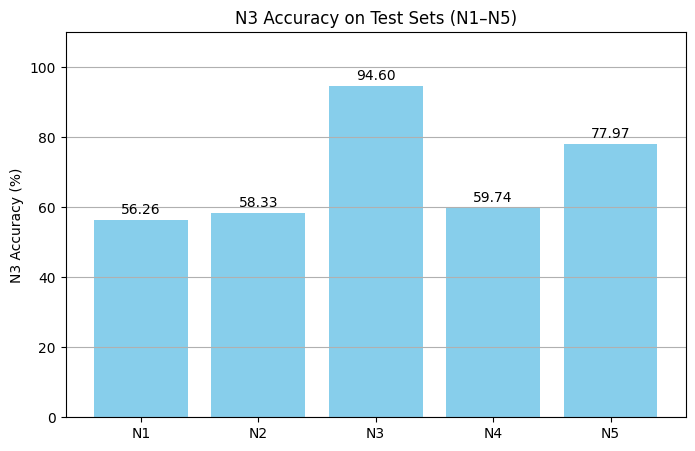

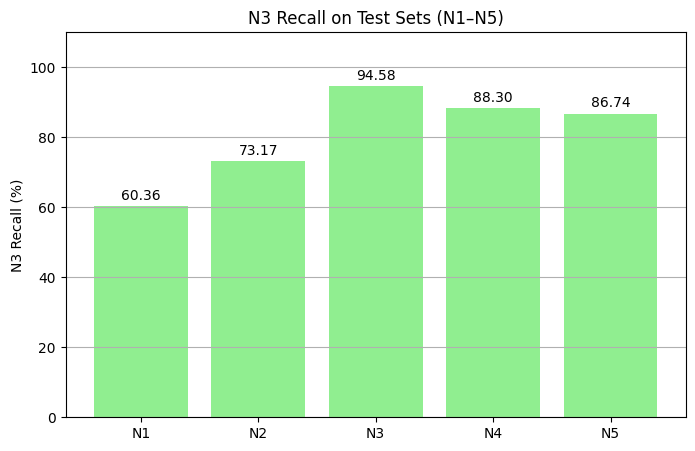

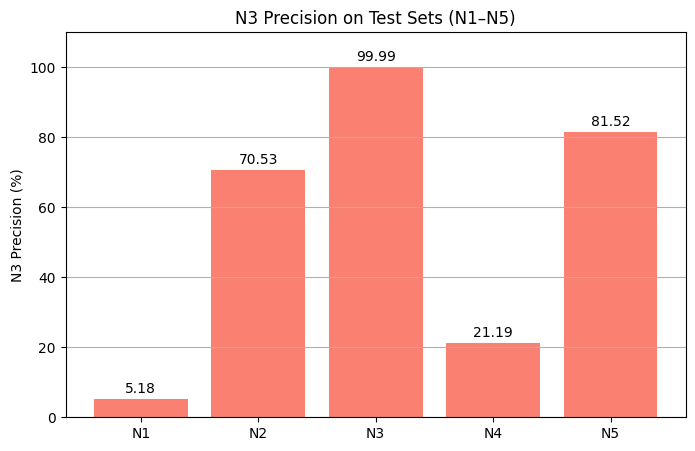

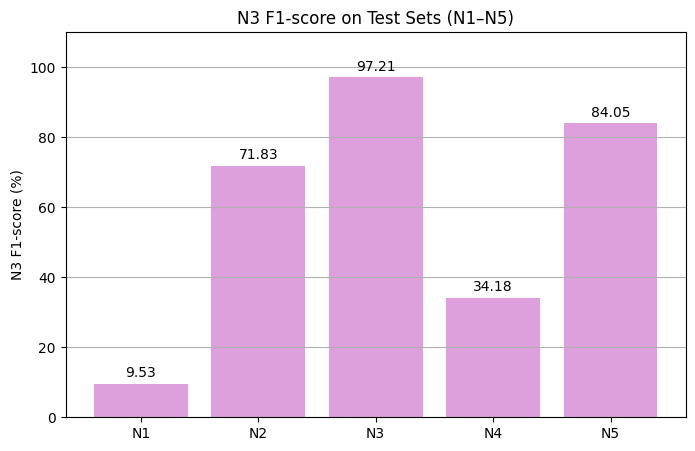

In [42]:
# ====== Metrics for N3 ======
accuracy_N3 = [
    score_N3_test_N1[1],
    score_N3_test_N2[1],
    score_N3_test_N3[1],
    score_N3_test_N4[1],
    score_N3_test_N5[1]
]

recall_N3 = [
    score_N3_test_N1[2],
    score_N3_test_N2[2],
    score_N3_test_N3[2],
    score_N3_test_N4[2],
    score_N3_test_N5[2]
]

precision_N3 = [
    score_N3_test_N1[3],
    score_N3_test_N2[3],
    score_N3_test_N3[3],
    score_N3_test_N4[3],
    score_N3_test_N5[3]
]

f1_score_N3 = [
    2 * (precision_N3[i] * recall_N3[i]) / (precision_N3[i] + recall_N3[i])
    for i in range(5)
]

# ====== Plot each metric for N3 ======
plot_bar_with_values(accuracy_N3, labels, 'N3 Accuracy on Test Sets (N1–N5)', 'skyblue')
plot_bar_with_values(recall_N3, labels, 'N3 Recall on Test Sets (N1–N5)', 'lightgreen')
plot_bar_with_values(precision_N3, labels, 'N3 Precision on Test Sets (N1–N5)', 'salmon')
plot_bar_with_values(f1_score_N3, labels, 'N3 F1-score on Test Sets (N1–N5)', 'plum')

In [43]:
score_N4_test_N1 = loaded_model_N4.evaluate(X_df_test_N1, Y_df_test_N1, verbose=1)

print('Test Model Network 4 with Data Test Network 1:')
print('Test loss:', score_N4_test_N1[0])
print('Test accuracy:', score_N4_test_N1[1])
print('Test recall:', score_N4_test_N1[2])
print('Test precision:', score_N4_test_N1[3])

f1_score_N4_test_N1 = 2 * (score_N4_test_N1[3] * score_N4_test_N1[2]) / (score_N4_test_N1[3] + score_N4_test_N1[2])
print('Test F1-score:', f1_score_N4_test_N1)

4347/4347 ━━━━━━━━━━━━━━━━━━━━ 4s 796us/step - accuracy: 0.8175 - loss: 0.7063 - precision: 0.0051 - recall: 0.0201
Test Model Network 4 with Data Test Network 1:
Test loss: 0.7199224829673767
Test accuracy: 0.8164848685264587
Test recall: 0.02015065960586071
Test precision: 0.005238421726971865
Test F1-score: 0.008315200672948362


In [44]:
score_N4_test_N2 = loaded_model_N4.evaluate(X_df_test_N2, Y_df_test_N2, verbose=1)

print('Test Model Network 4 with Data Test Network 2:')
print('Test loss:', score_N4_test_N2[0])
print('Test accuracy:', score_N4_test_N2[1])
print('Test recall:', score_N4_test_N2[2])
print('Test precision:', score_N4_test_N2[3])

f1_score_N4_test_N2 = 2 * (score_N4_test_N2[3] * score_N4_test_N2[2]) / (score_N4_test_N2[3] + score_N4_test_N2[2])
print('Test F1-score:', f1_score_N4_test_N2)

110834/110834 ━━━━━━━━━━━━━━━━━━━━ 88s 794us/step - accuracy: 0.3243 - loss: 3.2550 - precision: 0.6513 - recall: 0.1498
Test Model Network 4 with Data Test Network 2:
Test loss: 3.254579782485962
Test accuracy: 0.3245752155780792
Test recall: 0.14989589154720306
Test precision: 0.6511224508285522
Test F1-score: 0.24369124927619096


In [45]:
score_N4_test_N3 = loaded_model_N4.evaluate(X_df_test_N3, Y_df_test_N3, verbose=1)

print('Test Model Network 4 with Data Test Network 3:')
print('Test loss:', score_N4_test_N3[0])
print('Test accuracy:', score_N4_test_N3[1])
print('Test recall:', score_N4_test_N3[2])
print('Test precision:', score_N4_test_N3[3])

f1_score_N4_test_N3 = 2 * (score_N4_test_N3[3] * score_N4_test_N3[2]) / (score_N4_test_N3[3] + score_N4_test_N3[2])
print('Test F1-score:', f1_score_N4_test_N3)

256670/256670 ━━━━━━━━━━━━━━━━━━━━ 204s 795us/step - accuracy: 0.5281 - loss: 4.1983 - precision: 0.9951 - recall: 0.5286
Test Model Network 4 with Data Test Network 3:
Test loss: 4.200619220733643
Test accuracy: 0.527899980545044
Test recall: 0.5284844636917114
Test precision: 0.9951038956642151
Test F1-score: 0.6903399404284636


In [46]:
score_N4_test_N4 = loaded_model_N4.evaluate(X_df_test_N4, Y_df_test_N4, verbose=1)

print('Test Model Network 4 with Data Test Network 4:')
print('Test loss:', score_N4_test_N4[0])
print('Test accuracy:', score_N4_test_N4[1])
print('Test recall:', score_N4_test_N4[2])
print('Test precision:', score_N4_test_N4[3])

f1_score_N4_test_N4 = 2 * (score_N4_test_N4[3] * score_N4_test_N4[2]) / (score_N4_test_N4[3] + score_N4_test_N4[2])
print('Test F1-score:', f1_score_N4_test_N4)

144532/144532 ━━━━━━━━━━━━━━━━━━━━ 114s 790us/step - accuracy: 0.9020 - loss: 0.4299 - precision: 0.6458 - recall: 0.3819
Test Model Network 4 with Data Test Network 4:
Test loss: 0.4296584129333496
Test accuracy: 0.9019535779953003
Test recall: 0.3821880519390106
Test precision: 0.6450867056846619
Test F1-score: 0.4799970593022064


In [47]:
score_N4_test_N5 = loaded_model_N4.evaluate(X_df_test_N5, Y_df_test_N5, verbose=1)

print('Test Model Network 4 with Data Test Network 5:')
print('Test loss:', score_N4_test_N5[0])
print('Test accuracy:', score_N4_test_N5[1])
print('Test recall:', score_N4_test_N5[2])
print('Test precision:', score_N4_test_N5[3])

f1_score_N4_test_N5 = 2 * (score_N4_test_N5[3] * score_N4_test_N5[2]) / (score_N4_test_N5[3] + score_N4_test_N5[2])
print('Test F1-score:', f1_score_N4_test_N5)

528796/528796 ━━━━━━━━━━━━━━━━━━━━ 420s 794us/step - accuracy: 0.6365 - loss: 3.0373 - precision: 0.8871 - recall: 0.5233
Test Model Network 4 with Data Test Network 5:
Test loss: 3.037964105606079
Test accuracy: 0.6363158822059631
Test recall: 0.5230777859687805
Test precision: 0.8870722651481628
Test F1-score: 0.6580970529774239


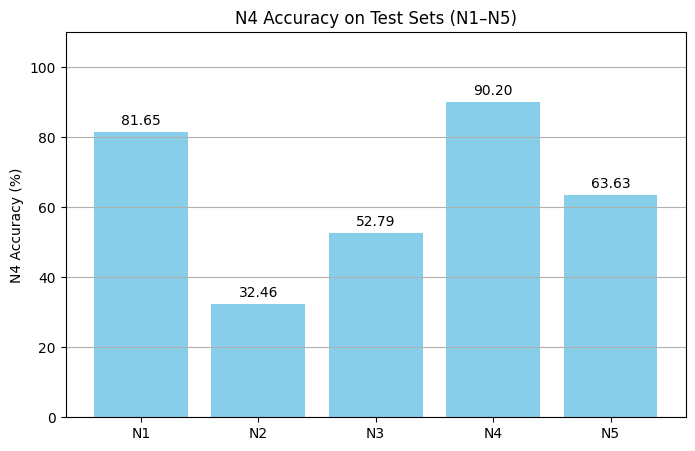

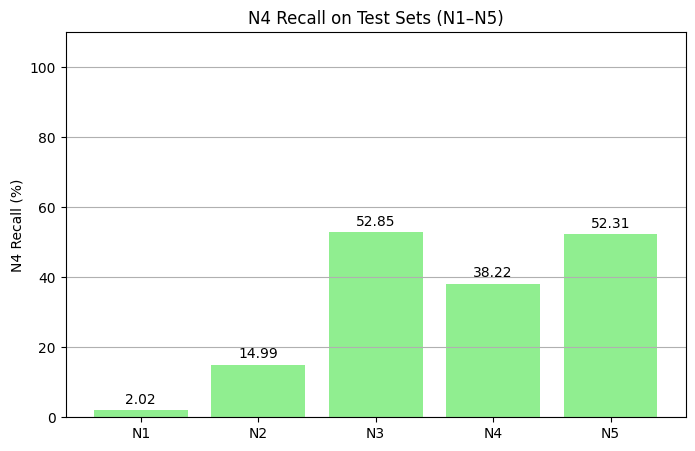

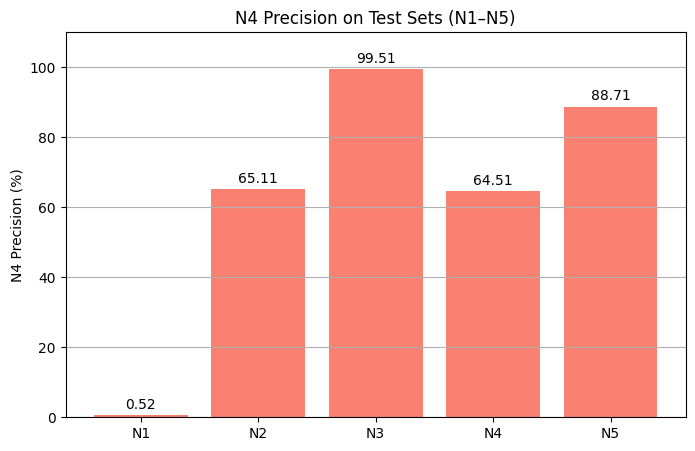

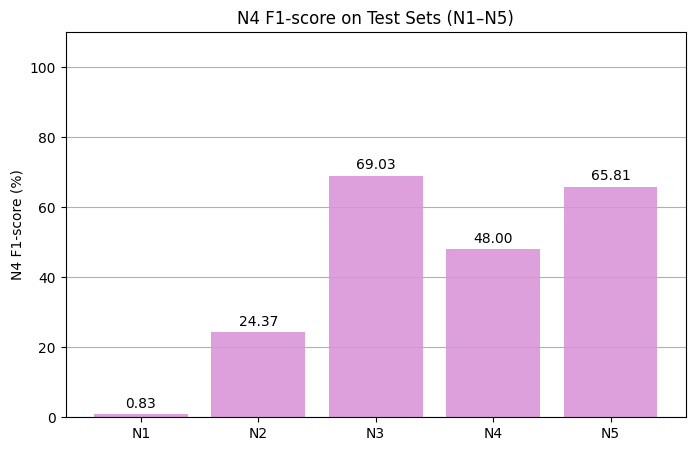

In [48]:
# ====== Metrics for N4 ======
accuracy_N4 = [
    score_N4_test_N1[1],
    score_N4_test_N2[1],
    score_N4_test_N3[1],
    score_N4_test_N4[1],
    score_N4_test_N5[1]
]

recall_N4 = [
    score_N4_test_N1[2],
    score_N4_test_N2[2],
    score_N4_test_N3[2],
    score_N4_test_N4[2],
    score_N4_test_N5[2]
]

precision_N4 = [
    score_N4_test_N1[3],
    score_N4_test_N2[3],
    score_N4_test_N3[3],
    score_N4_test_N4[3],
    score_N4_test_N5[3]
]

f1_score_N4 = [
    2 * (precision_N4[i] * recall_N4[i]) / (precision_N4[i] + recall_N4[i])
    for i in range(5)
]

# ====== Plot each metric for N4 ======
plot_bar_with_values(accuracy_N4, labels, 'N4 Accuracy on Test Sets (N1–N5)', 'skyblue')
plot_bar_with_values(recall_N4, labels, 'N4 Recall on Test Sets (N1–N5)', 'lightgreen')
plot_bar_with_values(precision_N4, labels, 'N4 Precision on Test Sets (N1–N5)', 'salmon')
plot_bar_with_values(f1_score_N4, labels, 'N4 F1-score on Test Sets (N1–N5)', 'plum')

In [49]:
score_N5_test_N1 = loaded_model_N5.evaluate(X_df_test_N1, Y_df_test_N1, verbose=1)

print('Test Model Network 5 with Data Test Network 1:')
print('Test loss:', score_N5_test_N1[0])
print('Test accuracy:', score_N5_test_N1[1])
print('Test recall:', score_N5_test_N1[2])
print('Test precision:', score_N5_test_N1[3])

f1_score_N5_test_N1 = 2 * (score_N5_test_N1[3] * score_N5_test_N1[2]) / (score_N5_test_N1[3] + score_N5_test_N1[2])
print('Test F1-score:', f1_score_N5_test_N1)

4347/4347 ━━━━━━━━━━━━━━━━━━━━ 4s 791us/step - accuracy: 0.6531 - loss: 1.2335 - precision: 0.0494 - recall: 0.4545
Test Model Network 5 with Data Test Network 1:
Test loss: 1.2290362119674683
Test accuracy: 0.654735267162323
Test recall: 0.4561205208301544
Test precision: 0.05093478411436081
Test F1-score: 0.09163655337816037


In [50]:
score_N5_test_N2 = loaded_model_N5.evaluate(X_df_test_N2, Y_df_test_N2, verbose=1)

print('Test Model Network 5 with Data Test Network 2:')
print('Test loss:', score_N5_test_N2[0])
print('Test accuracy:', score_N5_test_N2[1])
print('Test recall:', score_N5_test_N2[2])
print('Test precision:', score_N5_test_N2[3])

f1_score_N5_test_N2 = 2 * (score_N5_test_N2[3] * score_N5_test_N2[2]) / (score_N5_test_N2[3] + score_N5_test_N2[2])
print('Test F1-score:', f1_score_N5_test_N2)

110834/110834 ━━━━━━━━━━━━━━━━━━━━ 88s 792us/step - accuracy: 0.5602 - loss: 2.3200 - precision: 0.7492 - recall: 0.5929
Test Model Network 5 with Data Test Network 2:
Test loss: 2.321279764175415
Test accuracy: 0.5599657893180847
Test recall: 0.5924742817878723
Test precision: 0.7489151358604431
Test F1-score: 0.6615721749421393


In [51]:
score_N5_test_N3 = loaded_model_N5.evaluate(X_df_test_N3, Y_df_test_N3, verbose=1)

print('Test Model Network 5 with Data Test Network 3:')
print('Test loss:', score_N5_test_N3[0])
print('Test accuracy:', score_N5_test_N3[1])
print('Test recall:', score_N5_test_N3[2])
print('Test precision:', score_N5_test_N3[3])

f1_score_N5_test_N3 = 2 * (score_N5_test_N3[3] * score_N5_test_N3[2]) / (score_N5_test_N3[3] + score_N5_test_N3[2])
print('Test F1-score:', f1_score_N5_test_N3)

256670/256670 ━━━━━━━━━━━━━━━━━━━━ 203s 791us/step - accuracy: 0.9272 - loss: 0.3289 - precision: 0.9993 - recall: 0.9275
Test Model Network 5 with Data Test Network 3:
Test loss: 0.328462153673172
Test accuracy: 0.9272285103797913
Test recall: 0.9275287985801697
Test precision: 0.9993417263031006
Test F1-score: 0.9620970571700456


In [52]:
score_N5_test_N4 = loaded_model_N5.evaluate(X_df_test_N4, Y_df_test_N4, verbose=1)

print('Test Model Network 5 with Data Test Network 4:')
print('Test loss:', score_N5_test_N4[0])
print('Test accuracy:', score_N5_test_N4[1])
print('Test recall:', score_N5_test_N4[2])
print('Test precision:', score_N5_test_N4[3])

f1_score_N5_test_N4 = 2 * (score_N5_test_N4[3] * score_N5_test_N4[2]) / (score_N5_test_N4[3] + score_N5_test_N4[2])
print('Test F1-score:', f1_score_N5_test_N4)

144532/144532 ━━━━━━━━━━━━━━━━━━━━ 115s 797us/step - accuracy: 0.7802 - loss: 1.3144 - precision: 0.3305 - recall: 0.8334
Test Model Network 5 with Data Test Network 4:
Test loss: 1.3168848752975464
Test accuracy: 0.7801219820976257
Test recall: 0.8343985676765442
Test precision: 0.3303436040878296
Test F1-score: 0.4733034258980257


In [53]:
score_N5_test_N5 = loaded_model_N5.evaluate(X_df_test_N5, Y_df_test_N5, verbose=1)

print('Test Model Network 5 with Data Test Network 5:')
print('Test loss:', score_N5_test_N5[0])
print('Test accuracy:', score_N5_test_N5[1])
print('Test recall:', score_N5_test_N5[2])
print('Test precision:', score_N5_test_N5[3])

f1_score_N5_test_N5 = 2 * (score_N5_test_N5[3] * score_N5_test_N5[2]) / (score_N5_test_N5[3] + score_N5_test_N5[2])
print('Test F1-score:', f1_score_N5_test_N5)

528796/528796 ━━━━━━━━━━━━━━━━━━━━ 420s 793us/step - accuracy: 0.8217 - loss: 0.6300 - precision: 0.9252 - recall: 0.7980
Test Model Network 5 with Data Test Network 5:
Test loss: 0.6300923824310303
Test accuracy: 0.8216790556907654
Test recall: 0.7979313135147095
Test precision: 0.9252917170524597
Test F1-score: 0.8569050228268421


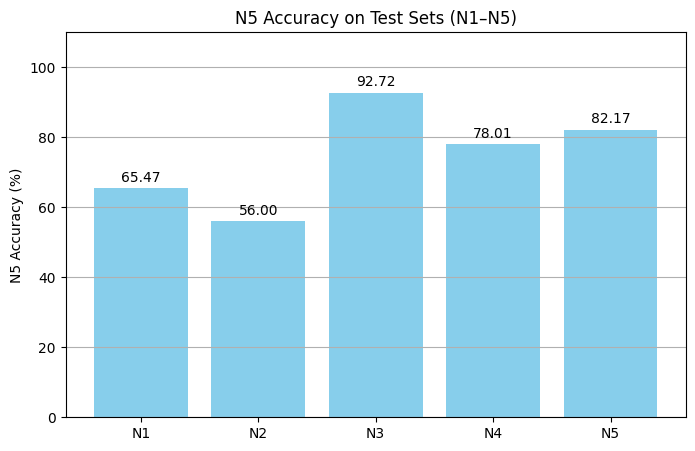

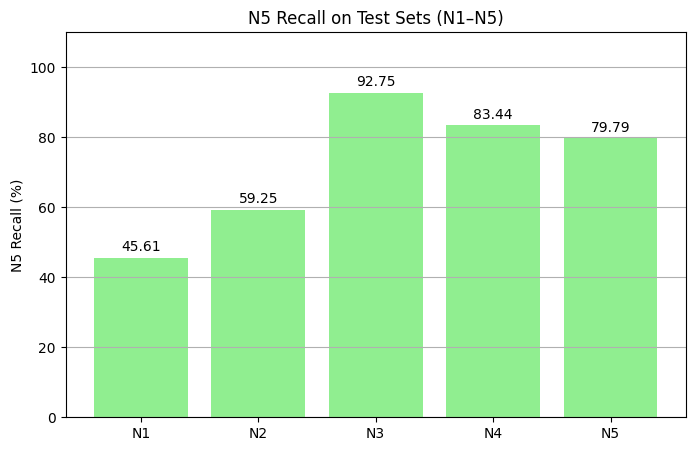

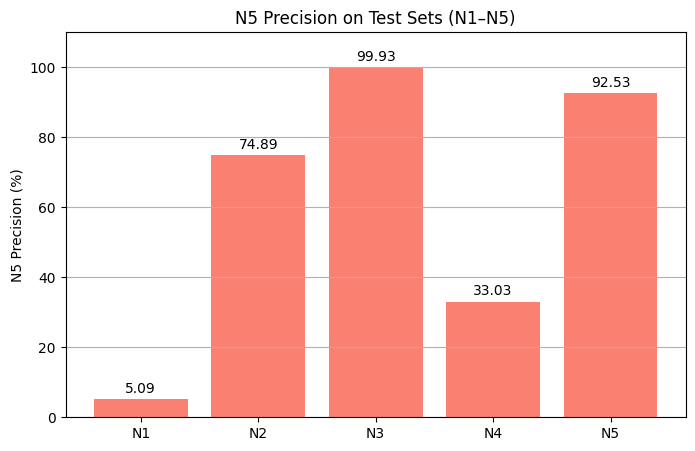

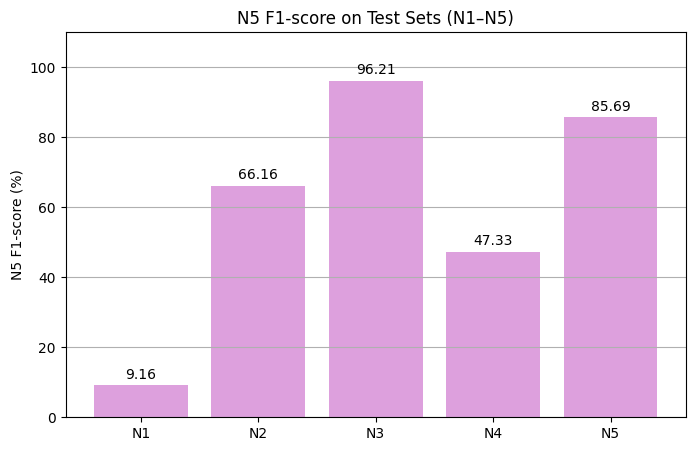

In [54]:
# ====== Metrics for N5 ======
accuracy_N5 = [
    score_N5_test_N1[1],
    score_N5_test_N2[1],
    score_N5_test_N3[1],
    score_N5_test_N4[1],
    score_N5_test_N5[1]
]

recall_N5 = [
    score_N5_test_N1[2],
    score_N5_test_N2[2],
    score_N5_test_N3[2],
    score_N5_test_N4[2],
    score_N5_test_N5[2]
]

precision_N5 = [
    score_N5_test_N1[3],
    score_N5_test_N2[3],
    score_N5_test_N3[3],
    score_N5_test_N4[3],
    score_N5_test_N5[3]
]

f1_score_N5 = [
    2 * (precision_N5[i] * recall_N5[i]) / (precision_N5[i] + recall_N5[i])
    for i in range(5)
]

# ====== Plot each metric for N5 ======
plot_bar_with_values(accuracy_N5, labels, 'N5 Accuracy on Test Sets (N1–N5)', 'skyblue')
plot_bar_with_values(recall_N5, labels, 'N5 Recall on Test Sets (N1–N5)', 'lightgreen')
plot_bar_with_values(precision_N5, labels, 'N5 Precision on Test Sets (N1–N5)', 'salmon')
plot_bar_with_values(f1_score_N5, labels, 'N5 F1-score on Test Sets (N1–N5)', 'plum')